# Assignment 6

## Assignment 6.1

Compare instance-based and metric-based constrained clustering in terms of similarities, differences, advantages, and disadvantages.

Instance-based constrained clustering algorithms include for example COP-k-Means, similar to the idea of lazy learning. Metric based constrained-clustering is for example MPCK-Means and we actually learn a model.

### Similarities
Boht approaches use constraints (must link, cannot link).

### Differences
In the metric-based approach, we try to generalise from the knowledge we've gained. We can then even apply the learned metric to a new dataset. The instance-based approach simply applies the constraints onto the pairs of data and future datasets must be added to the constraint objects. 

### Advantages
Metric-based approaches usually have more global effects and it can make use of an independent training set ofconstraints; moreover, the learned metric can be applied to any future dataset. Instance-based approaches have more clearly explainable constraints implementation. 

### Disadvantages
Instance-based approaches can get stuck in local optima and they typically have local effects. Metric-based clustering could be more susceptible to overfitting.

## Assignment 6.2

Given is the following graph of must-link (solid lines) and cannot-link (dashed lines) constraints. Make use of their properties to induce additional constraints between the other nodes. What would happen if another cannot-link constraint is inserted between node 4 and 8? What if another must-link is introduced between 2 and 4?

<div align="center">
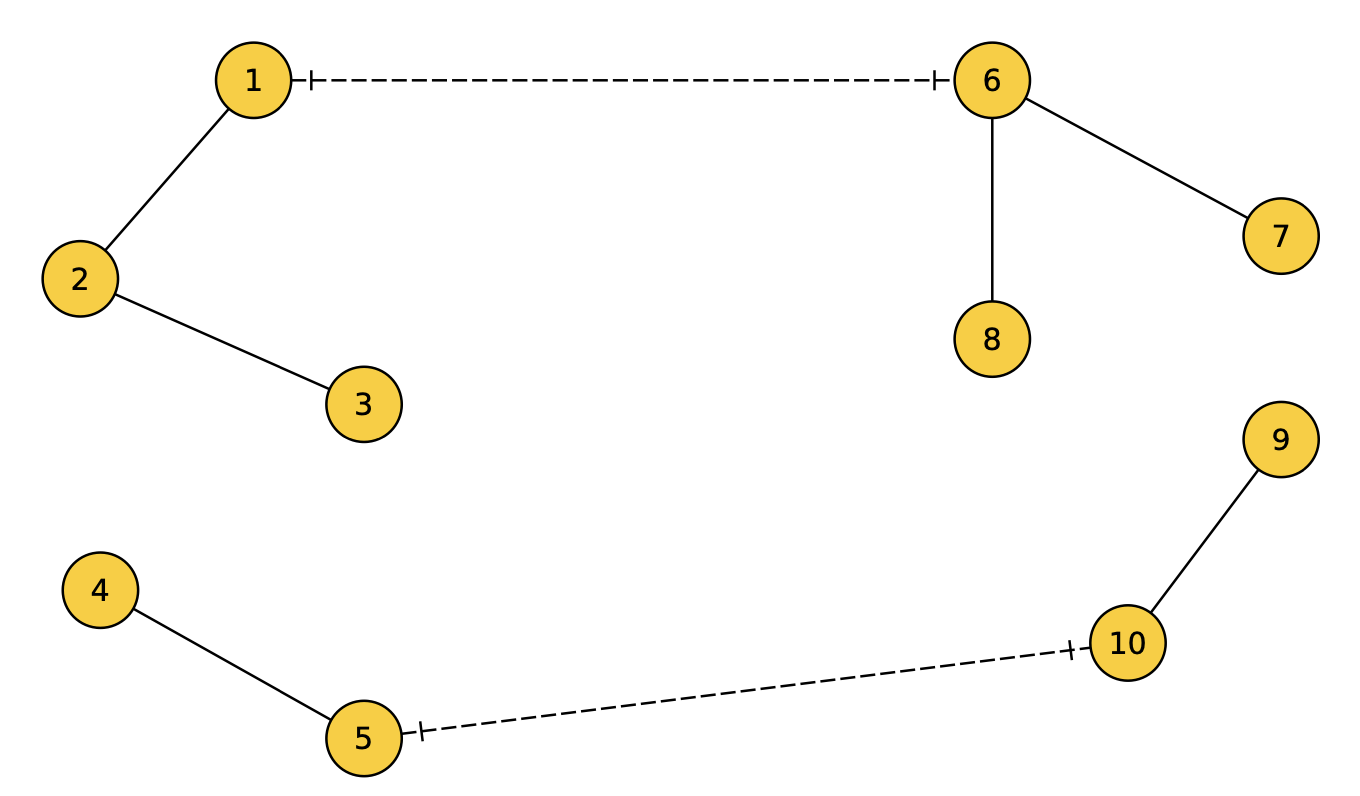
</div>

Adding new constraints:

For example, number 8 must link to 6 but 6 itself cannot link to 1. This means we can introduce a "cannot link" between 8 and 1. See the figure below with almost all derived constraints (black lines for must-link, grey for cannot-link). Cannot-link betwen 9-5 and 4-10 are missing.

<div align="center">
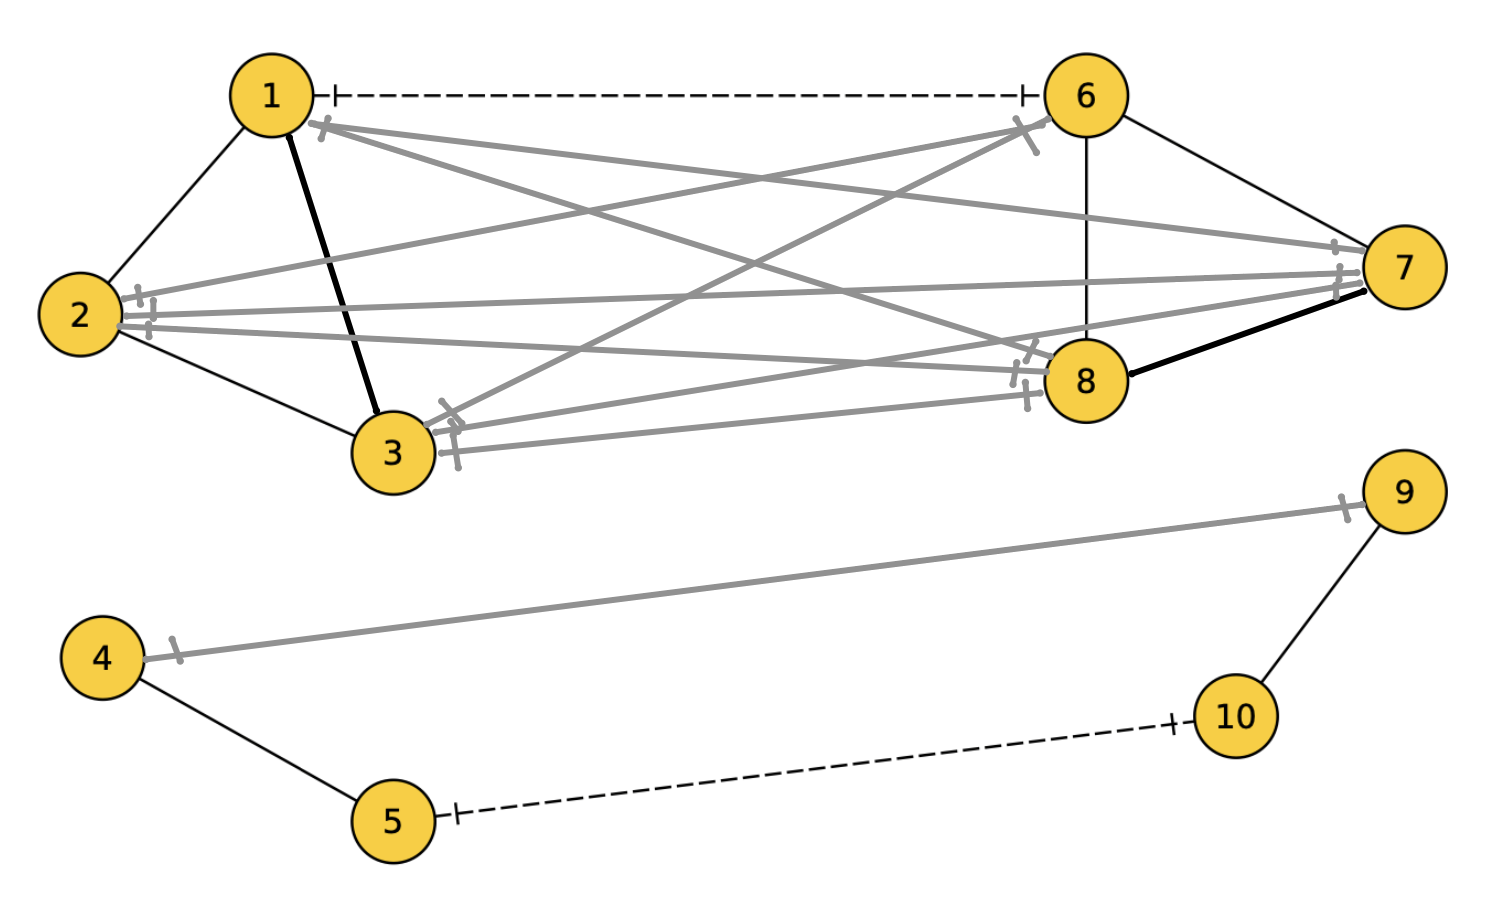
</div>

If a cannot-link is introduced between 8 and 4 then we effectively ensure numbers 4 and 5 are a different cluster to the one formed by 6, 7, and 8. If a must-link is added between 2 and 4 then we combine the two clusters (1, 2, 3) and (4, 5)

## Assignment 6.3

Explain how constraints can help clustering the following data. Also think about possible problems that may arise when adding contraints.

<div align="center">
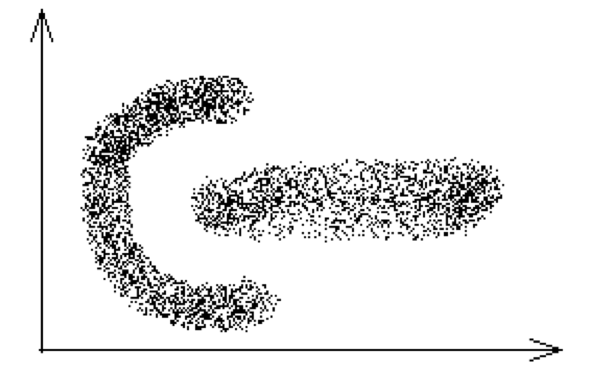
</div>

One problem with using clustering algorithms like k-means is that the shape of the clusters are the same - circular in nature. This problem could be therefore challenging. One seful way that we could mitigate this by is to introduce cannot-link constraints between the edges of each shape and within the shapes introduce must-link constraints. 

Below is a small toy example of using Gaussian Mixture Models, unrelated to the exercises. Practising an example broadly outlined by Ritvikmath

In [2]:
import scipy
import matplotlib.pyplot as plt
import numpy as np

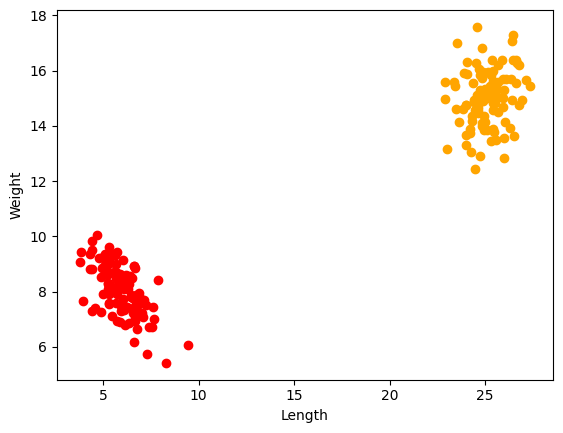

In [3]:
s_mu = [25, 15]
S_cov = [[1, 0.2],[0.2, 1]]

t_mu = [6, 8]
T_cov = [[1, -0.6],[-0.6, 1]]

x = np.linspace(0, 5, 40, endpoint=False)

salmon_data = scipy.stats.multivariate_normal.rvs(mean = s_mu, cov = S_cov, size = 100)
tuna_data = scipy.stats.multivariate_normal.rvs(mean = t_mu, cov = T_cov, size = 100)

plt.scatter(salmon_data[:, 0], salmon_data[:, 1], color="orange")
plt.scatter(tuna_data[:, 0], tuna_data[:, 1], color="red")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()


In [4]:
from sklearn.mixture import GaussianMixture
clf = GaussianMixture(n_components=2, covariance_type="full")
X = np.vstack([salmon_data, tuna_data])
clf.fit(X)
clf.means_

array([[25.10332177, 15.01178069],
       [ 5.93814225,  8.03807548]])

In [11]:
clf.covariances_[0]

array([[0.94727922, 0.18047371],
       [0.18047371, 1.04751928]])

In [12]:
x, y = np.mgrid[0:30:1, 5:20:1]
pos = np.dstack((x, y))
rv1 = scipy.stats.multivariate_normal(mean=clf.means_[0], cov=clf.covariances_[0])
rv2 = scipy.stats.multivariate_normal(mean=clf.means_[1], cov=clf.covariances_[1])

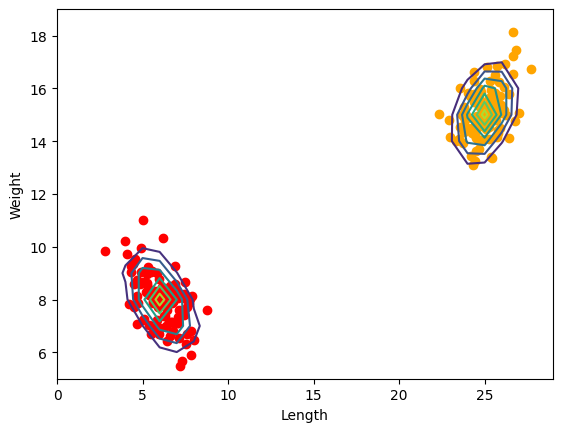

In [21]:
plt.scatter(salmon_data[:, 0], salmon_data[:, 1], color="orange")
plt.scatter(tuna_data[:, 0], tuna_data[:, 1], color="red")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.contour(x, y, rv1.pdf(pos))
plt.contour(x, y, rv2.pdf(pos))
plt.show()